In [2]:
import os, sys
os.environ["MALLOC_TRIM_THRESHOLD_"] = '0'
import numpy as np
import h5netcdf

import xarray as xr
import xarray.ufuncs as xu
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import colors
import cartopy.crs as ccrs
import cartopy

plt.rc("figure", figsize=(16,4))
plt.rc("font", size=14)
ccrs.PlateCarree()

from dask.distributed import Client, LocalCluster
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=4, protocol ='tcp')
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 1
Total threads: 4,Total memory: 78.61 GiB
Status: running,Using processes: False
Comm: tcp://127.0.0.1:35931,Workers: 1
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 78.61 GiB
Comm: tcp://127.0.0.1:34333,Total threads: 4
Dashboard: http://127.0.0.1:35149/status,Memory: 78.61 GiB
Nanny: None,


In [3]:
indir_anom = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/RAW_ANOMALY/TCWV/'

datasets = []
datasets_T = []
datasets_T_B = []

year = np.arange(2015,2016)
for y in year :
    ds = xr.open_mfdataset(indir_anom + '*' + str(y) + '.nc', chunks = {'time' : 1})
    ds_T = xr.open_mfdataset(indir_anom + '*' + str(y) + '*TOUCAN_without_biais.nc', chunks = {'time' : 1})
    ds_T_B = xr.open_mfdataset(indir_anom + '*' + str(y) + '*TOUCAN.nc', chunks = {'time' : 1})

    ds = ds.sel(latitude = slice(20,-20))
    ds_T = ds_T.sel(latitude = slice(20,-20))
    ds_T_B = ds_T_B.sel(latitude = slice(20,-20))


    datasets.append(ds)
    datasets_T.append(ds_T)
    datasets_T_B.append(ds_T_B)

ds = xr.concat(datasets, dim = 'time')
ds_T = xr.concat(datasets_T, dim = 'time')
ds_T_B = xr.concat(datasets_T_B, dim = 'time')

da = ds['tcwv_ano'].compute()
da_T = ds_T['tcwv_ano'].compute()
da_T_B = ds_T_B['tcwv_ano'].compute()

std = xr.open_mfdataset(indir_anom + '/MEAN/ds_anom_std_Y_PTOUCAN_C30.nc')
std_B = xr.open_mfdataset(indir_anom + '/MEAN/ds_anom_std_Y_TOUCAN.nc')



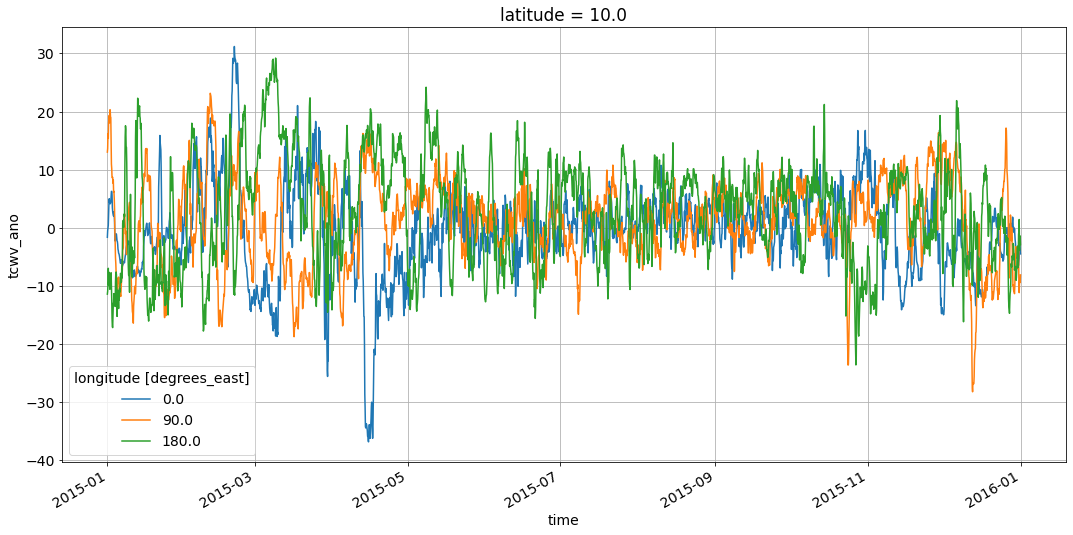

In [3]:
plt.rc("figure", figsize=(18,8))

latitude = 10
longitude = [0, 90, 180]

plt.figure()
da.sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
# ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
plt.grid()
# plt.legend()
plt.show()

# Californie

# Comparaison des anomalies entre la climatologie sur 30 ans et celle de TOUCAN avec le biais

In [6]:
std = xr.open_mfdataset(indir_anom + '/MEAN/ds_anom_std_Y.nc')
std = std.expand_dims(time = da.time)
std_B = xr.open_mfdataset(indir_anom + '/MEAN/ds_anom_std_Y_TOUCAN.nc')
std_B = std_B.expand_dims(time = da.time)

std_n = -std
std_B_n = -std_B

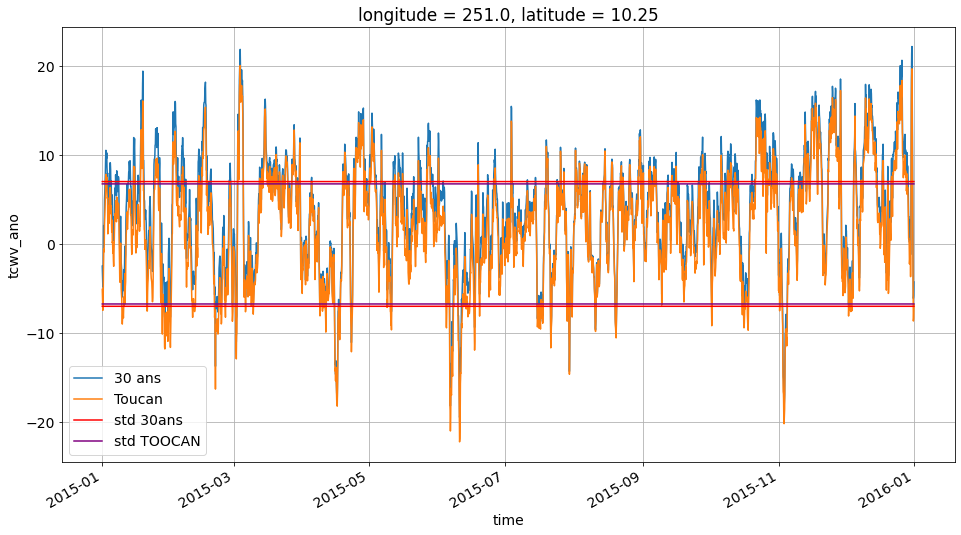

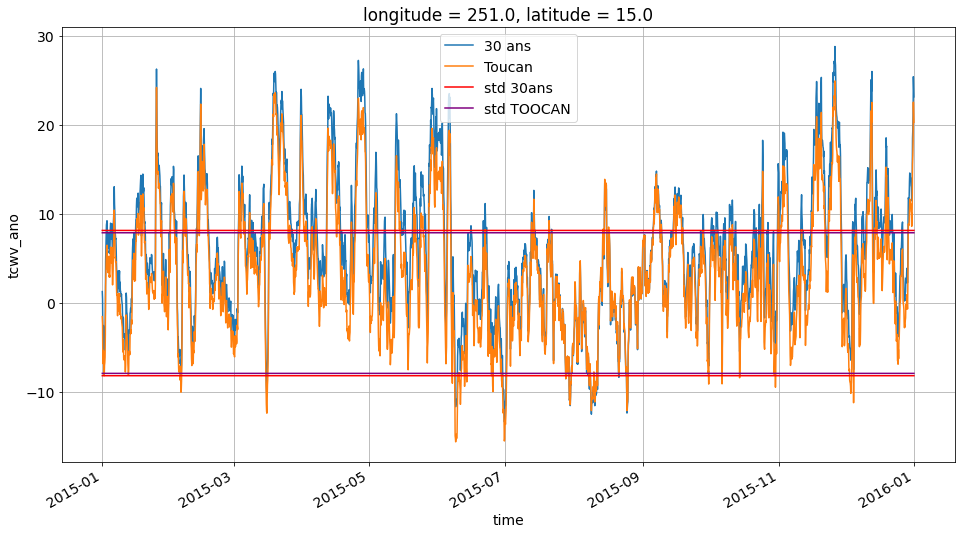

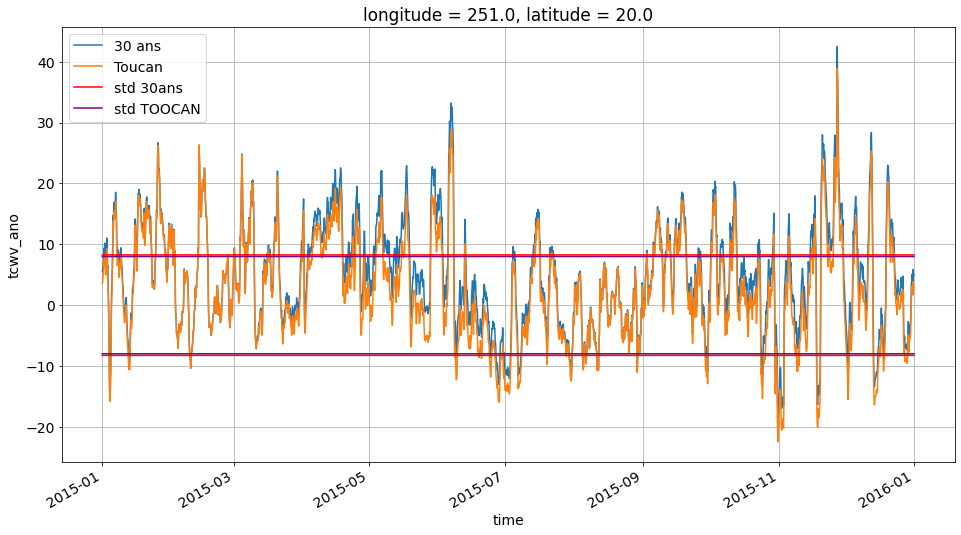

In [7]:
latitude = [10.3, 15, 20]
longitude = 251

for i in latitude :
    plt.figure(figsize=(16,8))
    da.sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = '30 ans')
    da_T_B.sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'Toucan')
    std['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std 30ans', color = 'red')
    std_n['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(color = 'red')
    std_B['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std TOOCAN', color = 'purple')
    std_B_n['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(color = 'purple')
    # ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
    plt.grid()
    plt.legend()
    plt.show()

# Comparaison des anomalies entre la climatologie sur 30 ans et celle de TOUCAN sans biais

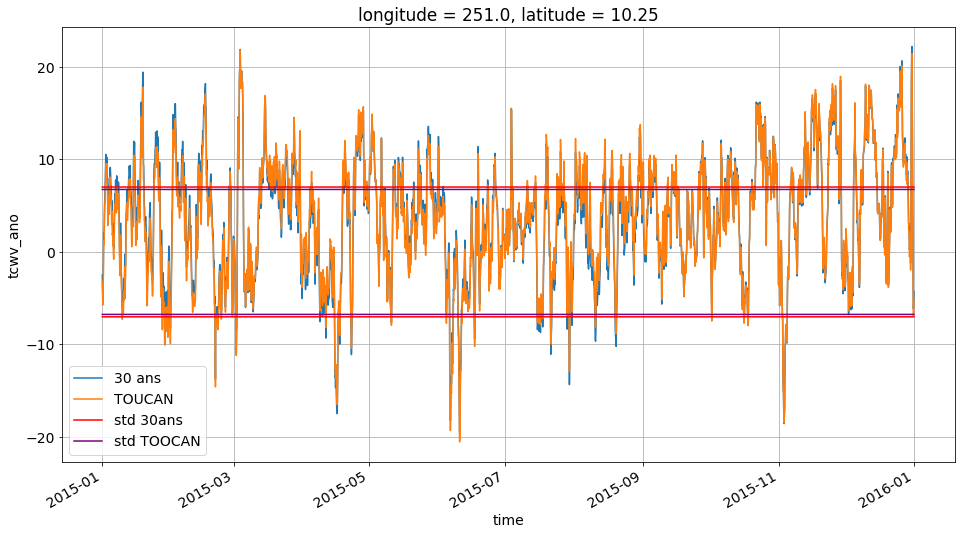

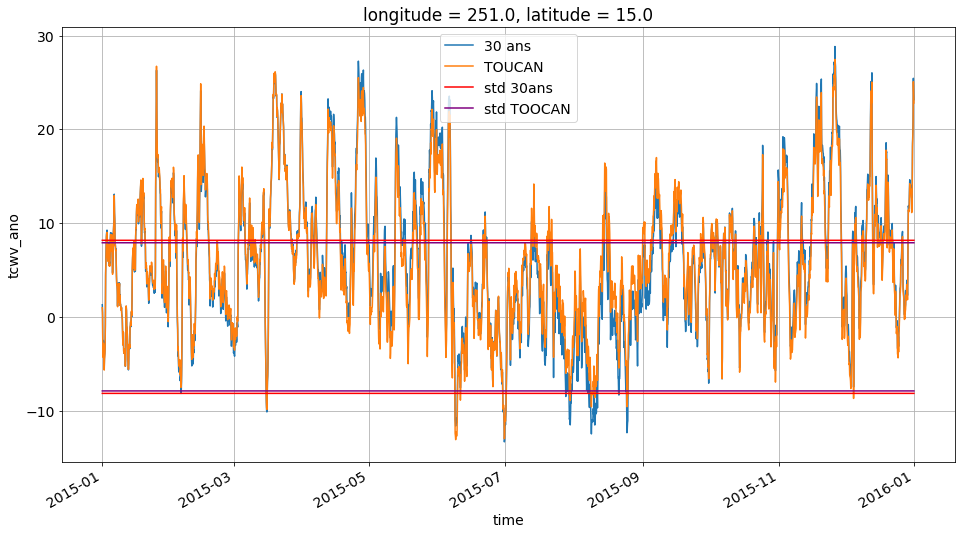

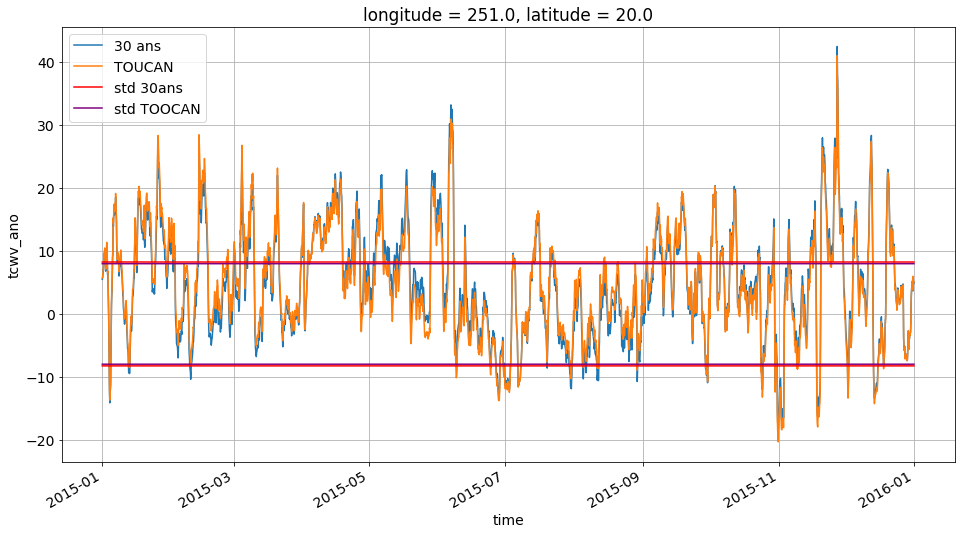

In [8]:
latitude = [10.3, 15, 20]
longitude = 251

for i in latitude :

    plt.figure(figsize=(16,8))
    da.sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = '30 ans')
    da_T.sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'TOUCAN')
    std['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std 30ans', color = 'red')
    std_n['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(color = 'red')
    std_B['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std TOOCAN', color = 'purple')
    std_B_n['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(color = 'purple')
    # ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
    plt.grid()
    plt.legend()
    plt.show()

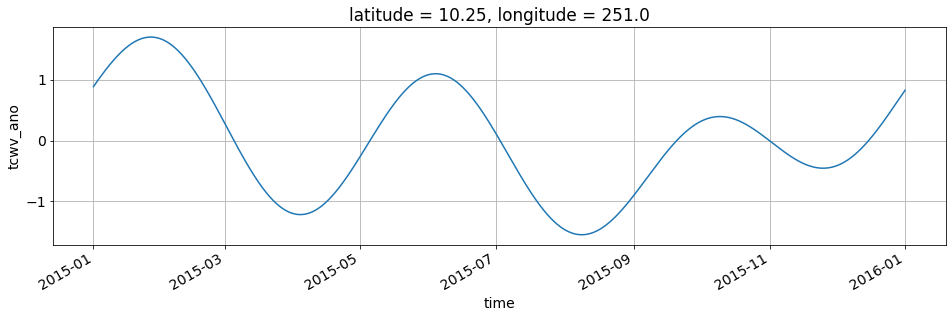

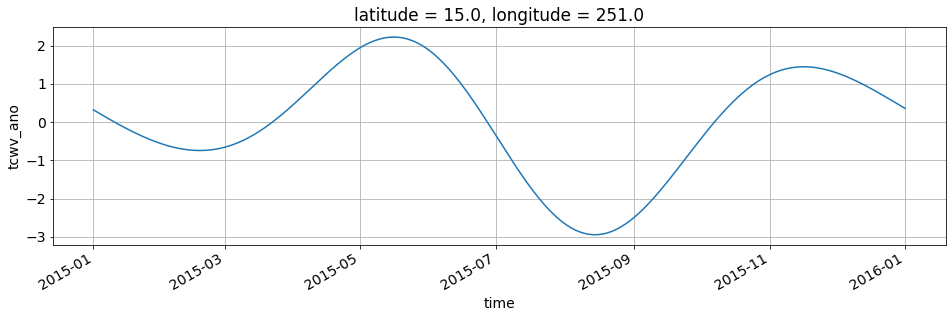

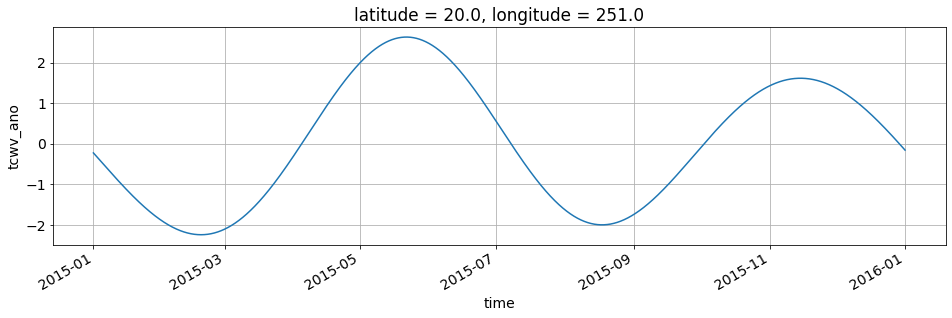

In [9]:
latitude = [10.3, 15, 20]
longitude = 251

for i in latitude :
    _da = da.sel(latitude = i, longitude = longitude, method = 'nearest')
    _da_T = da_T.sel(latitude = i, longitude = longitude, method = 'nearest')

    diff = _da - _da_T
    
    plt.figure()
    diff.plot(hue='longitude')
#     da_T.sel(latitude = latitude, longitude = i).plot(hue='longitude')

    # ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
    plt.grid()
    # plt.legend()
    plt.show()

# Australie

# Comparaison des anomalies entre la climatologie sur 30 ans et celle de TOUCAN avec le biais

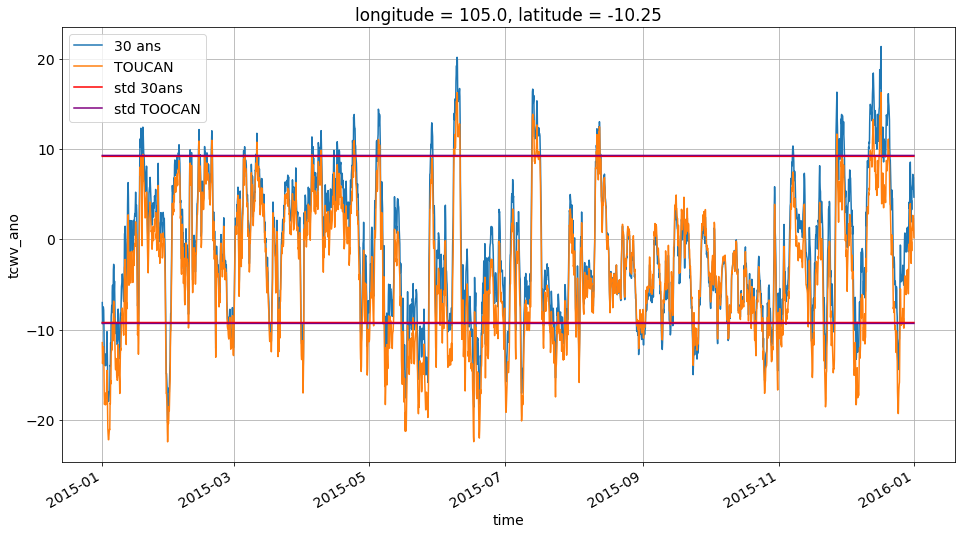

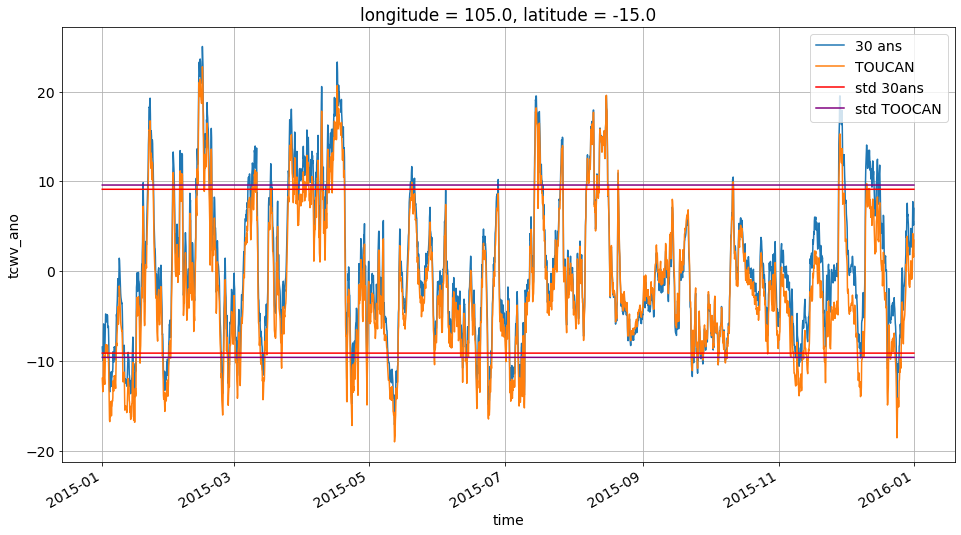

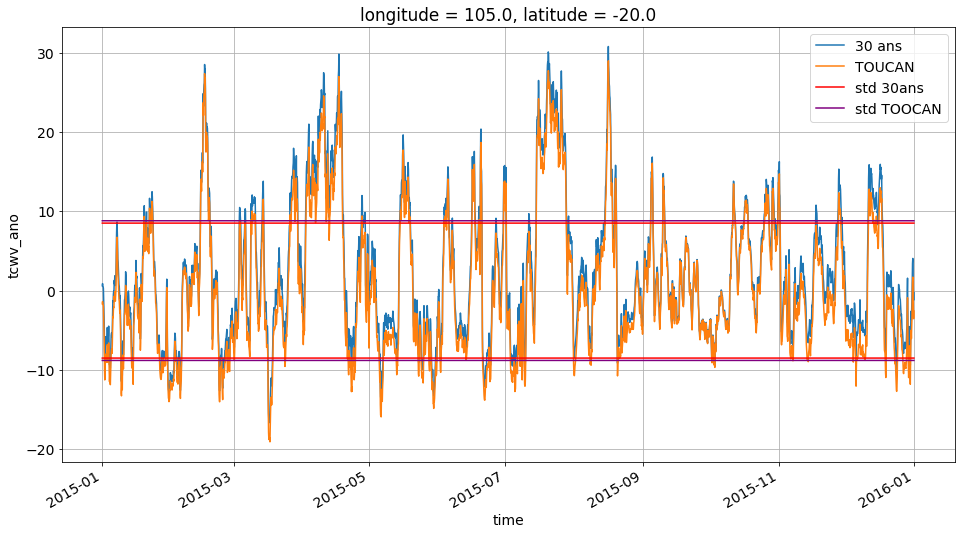

In [10]:
latitude = [-10.3, -15, -20]
longitude = 105

for i in latitude :

    plt.figure(figsize=(16,8))
    da.sel(latitude = i, longitude = longitude, method = "nearest").plot(label = '30 ans')
    da_T_B.sel(latitude = i, longitude = longitude, method = "nearest").plot(label = 'TOUCAN')
    std['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std 30ans', color = 'red')
    std_n['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(color = 'red')
    std_B['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std TOOCAN', color = 'purple')
    std_B_n['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(color = 'purple')
    # ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
    plt.grid()
    plt.legend()
    plt.show()

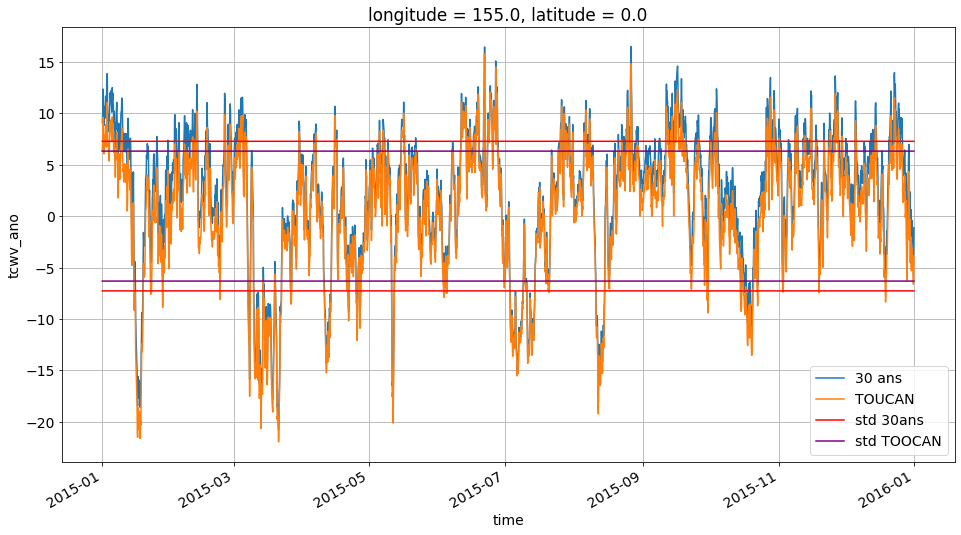

In [11]:
latitude = [0]
longitude = 155

for i in latitude :

    plt.figure(figsize=(16,8))
    da.sel(latitude = i, longitude = longitude, method = "nearest").plot(label = '30 ans')
    da_T_B.sel(latitude = i, longitude = longitude, method = "nearest").plot(label = 'TOUCAN')
    std['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std 30ans', color = 'red')
    std_n['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(color = 'red')
    std_B['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std TOOCAN', color = 'purple')
    std_B_n['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(color = 'purple')
    # ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
    plt.grid()
    plt.legend()
    plt.show()

# Comparaison des anomalies entre la climatologie sur 30 ans et celle de TOUCAN sans biais

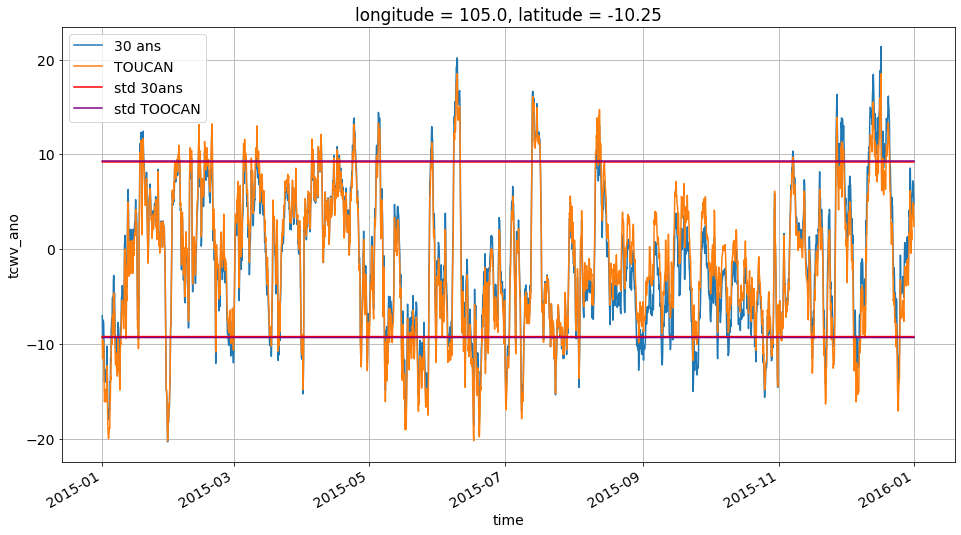

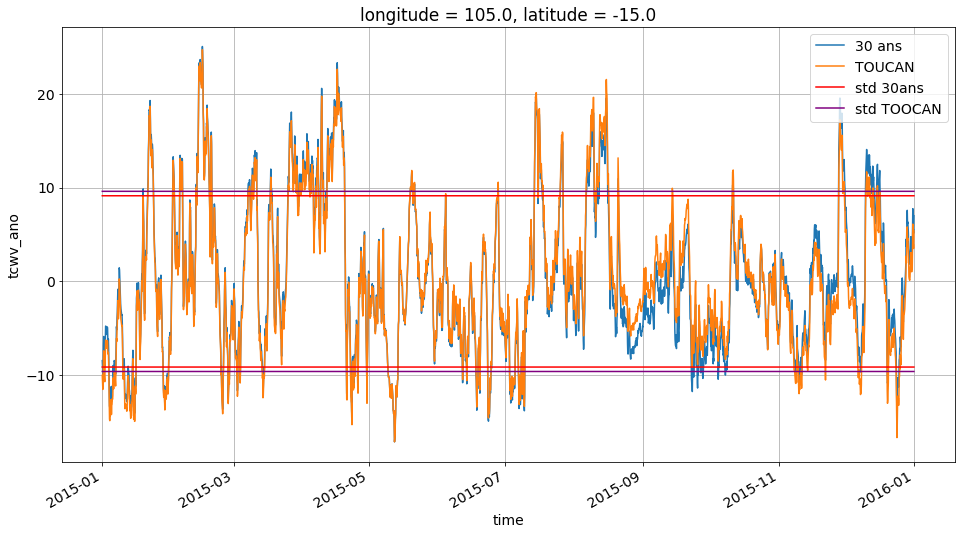

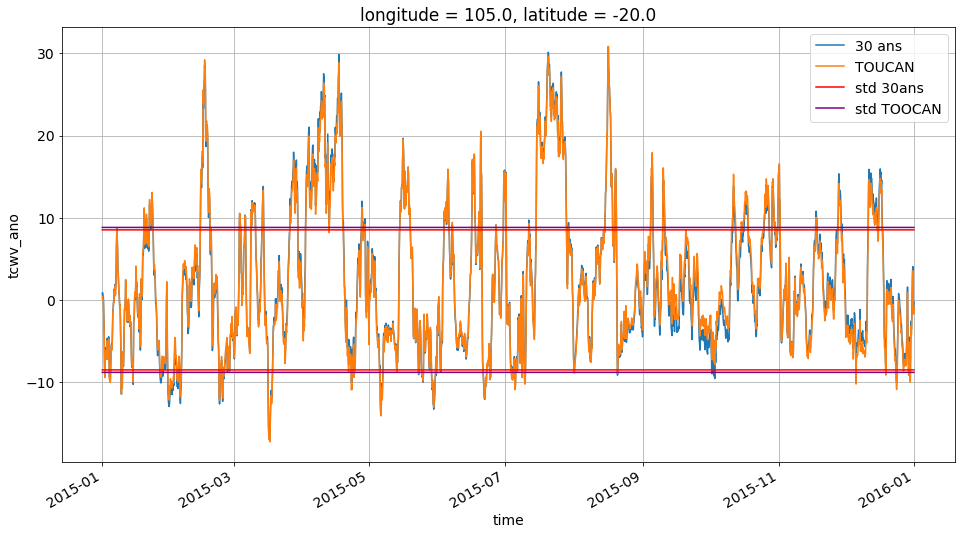

In [12]:
latitude = [-10.3, -15, -20]
longitude = 105

for i in latitude :

    plt.figure(figsize=(16,8))
    da.sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = '30 ans')
    da_T.sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'TOUCAN')
    std['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std 30ans', color = 'red')
    std_n['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(color = 'red')
    std_B['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std TOOCAN', color = 'purple')
    std_B_n['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(color = 'purple')
    plt.grid()
    plt.legend()
    plt.show()

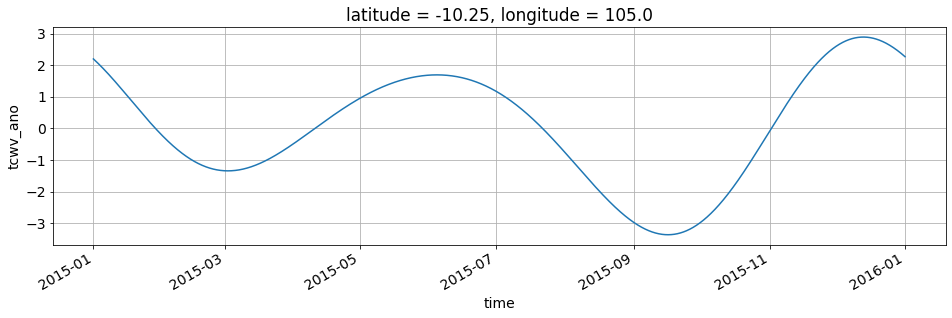

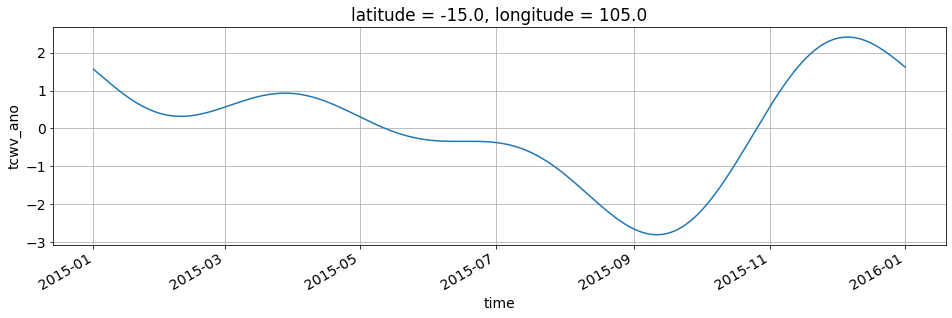

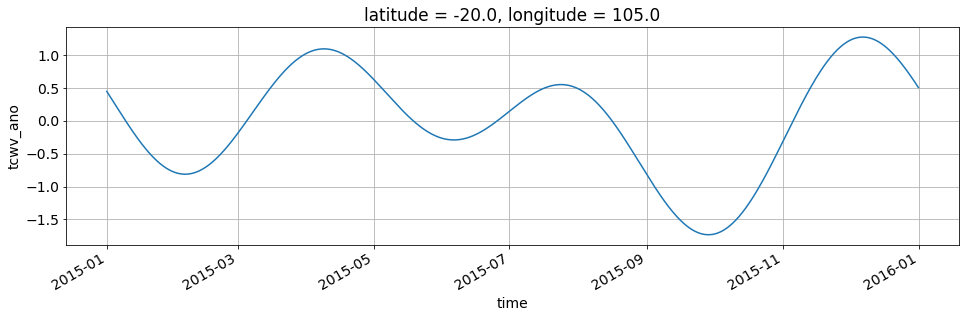

In [13]:
latitude = [10.3, 15, 20]
longitude = 105

for i in latitude :

    plt.figure()
    (da.sel(latitude = -i, longitude = longitude, method = "nearest")-
     da_T.sel(latitude = -i, longitude = longitude, method = "nearest")).plot(hue='longitude')

    # ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
    plt.grid()
    # plt.legend()
    plt.show()

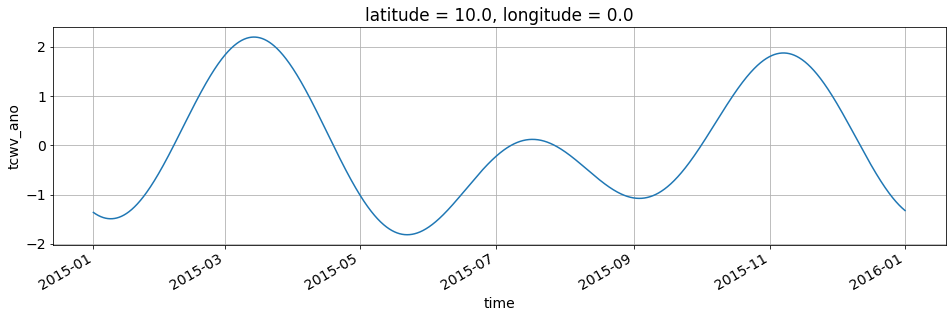

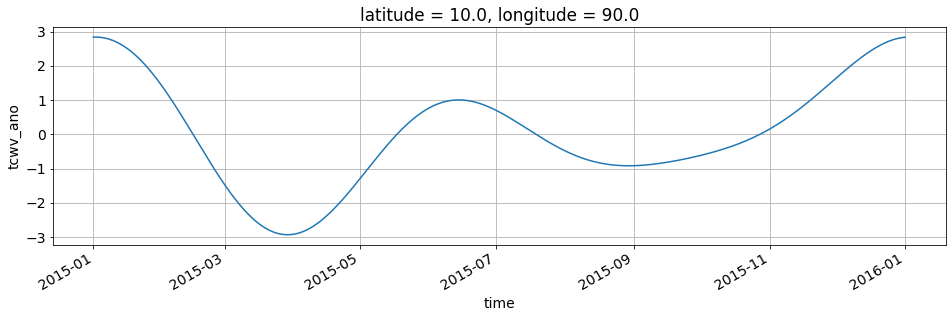

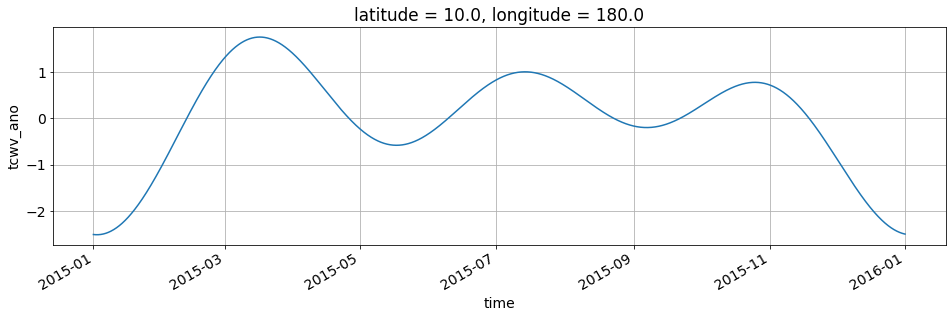

In [14]:
latitude = 10
longitude = [0, 90, 180]

for i in longitude :
    _da = da.sel(latitude = latitude, longitude = i)
    _da_T = da_T.sel(latitude = latitude, longitude = i)

    diff = _da - _da_T
    
    plt.figure()
    diff.plot(hue='longitude')
#     da_T.sel(latitude = latitude, longitude = i).plot(hue='longitude')

    # ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
    plt.grid()
    # plt.legend()
    plt.show()

In [15]:
da_jja_only = ds.sel(time=ds.time.dt.month.isin([7, 8, 9, 10]))
da_T_jja_only = ds_T.sel(time=ds.time.dt.month.isin([7, 8, 9, 10]))

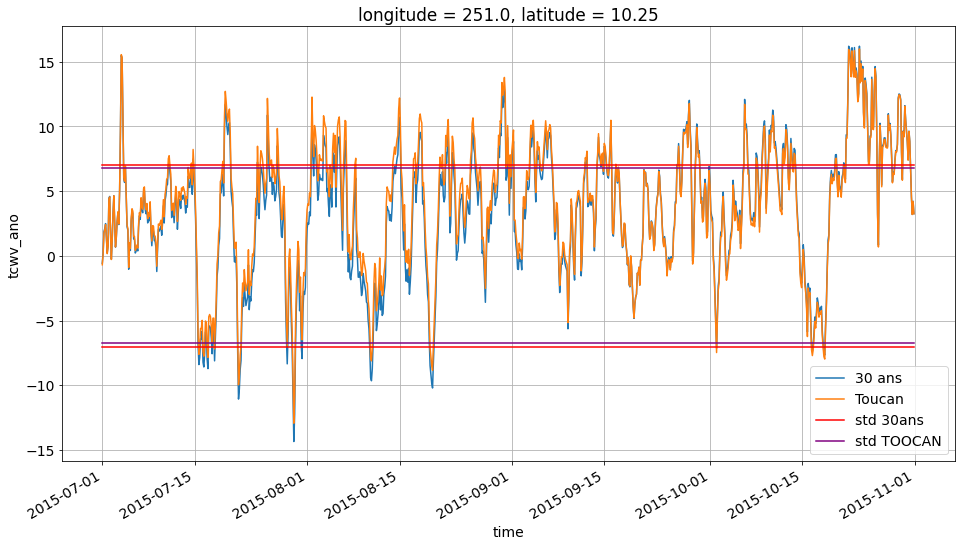

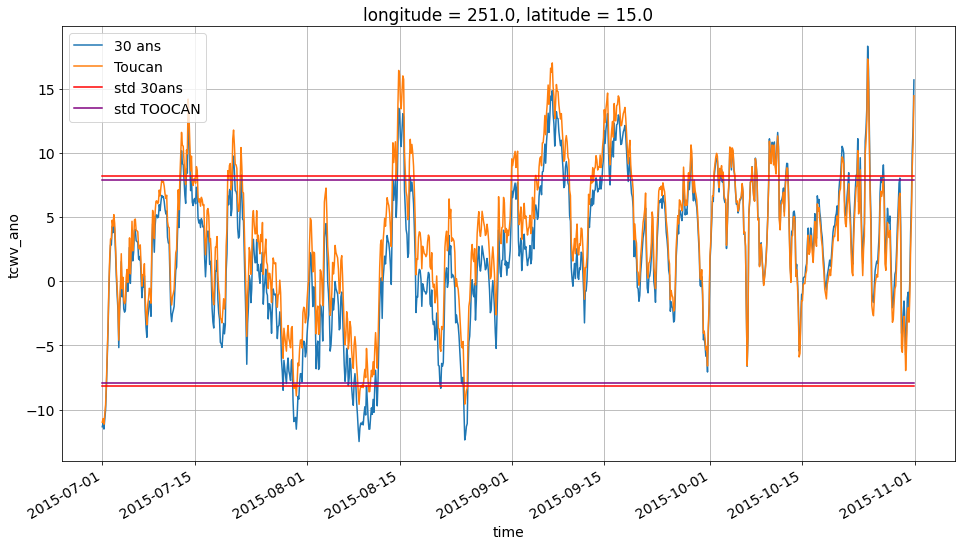

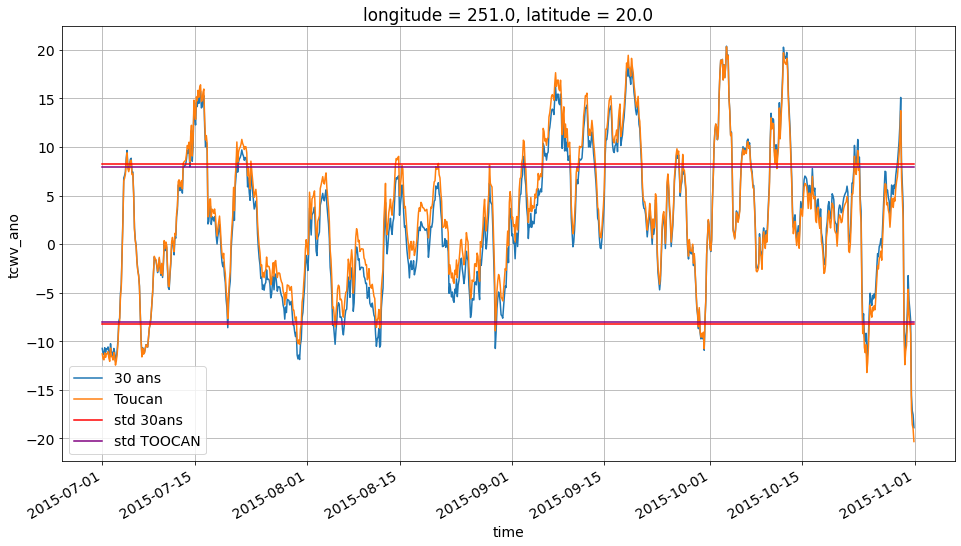

In [19]:
latitude = [10.3, 15, 20]
longitude = 251

for i in latitude :
    plt.figure(figsize=(16,8))
    da_jja_only['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = '30 ans')
    da_T_jja_only['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'Toucan')
    std['tcwv_ano'].sel(time = ds.time.dt.month.isin([7, 8, 9, 10]), 
                        latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std 30ans', color = 'red')
    std_n['tcwv_ano'].sel(time = ds.time.dt.month.isin([7, 8, 9, 10]),
                          latitude = i, longitude = longitude, method = 'nearest').plot(color = 'red')
    std_B['tcwv_ano'].sel(time = ds.time.dt.month.isin([7, 8, 9, 10]), 
                        latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std TOOCAN', color = 'purple')
    std_B_n['tcwv_ano'].sel(time = ds.time.dt.month.isin([7, 8, 9, 10]),
                          latitude = i, longitude = longitude, method = 'nearest').plot(color = 'purple') 
    # ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
    plt.grid()
    plt.legend()
    plt.show()

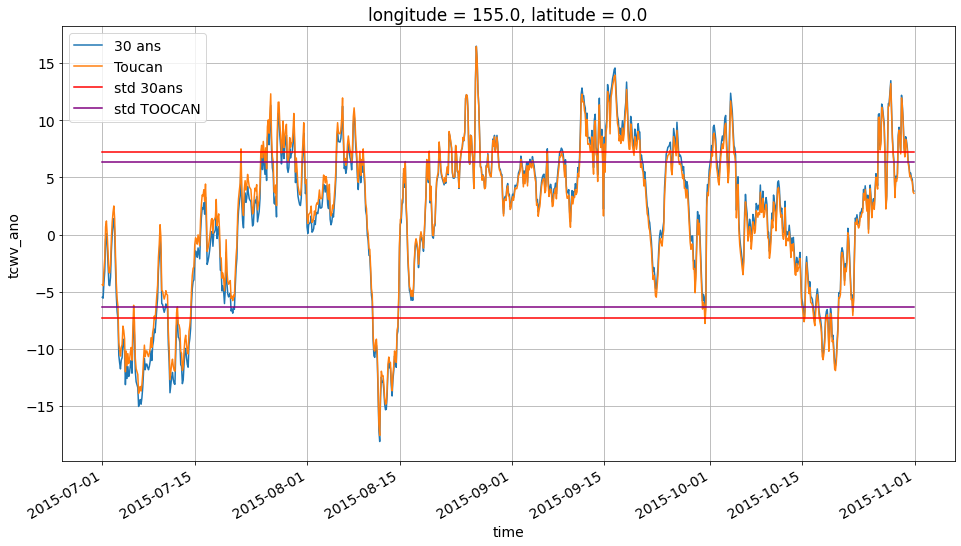

In [20]:
latitude = [0]
longitude = 155

for i in latitude :
    plt.figure(figsize=(16,8))
    da_jja_only['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = '30 ans')
    da_T_jja_only['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'Toucan')
    std['tcwv_ano'].sel(time = ds.time.dt.month.isin([7, 8, 9, 10]), 
                        latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std 30ans', color = 'red')
    std_n['tcwv_ano'].sel(time = ds.time.dt.month.isin([7, 8, 9, 10]),
                          latitude = i, longitude = longitude, method = 'nearest').plot(color = 'red')
    std_B['tcwv_ano'].sel(time = ds.time.dt.month.isin([7, 8, 9, 10]), 
                        latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std TOOCAN', color = 'purple')
    std_B_n['tcwv_ano'].sel(time = ds.time.dt.month.isin([7, 8, 9, 10]),
                          latitude = i, longitude = longitude, method = 'nearest').plot(color = 'purple') 
    # ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
    plt.grid()
    plt.legend()
    plt.show()

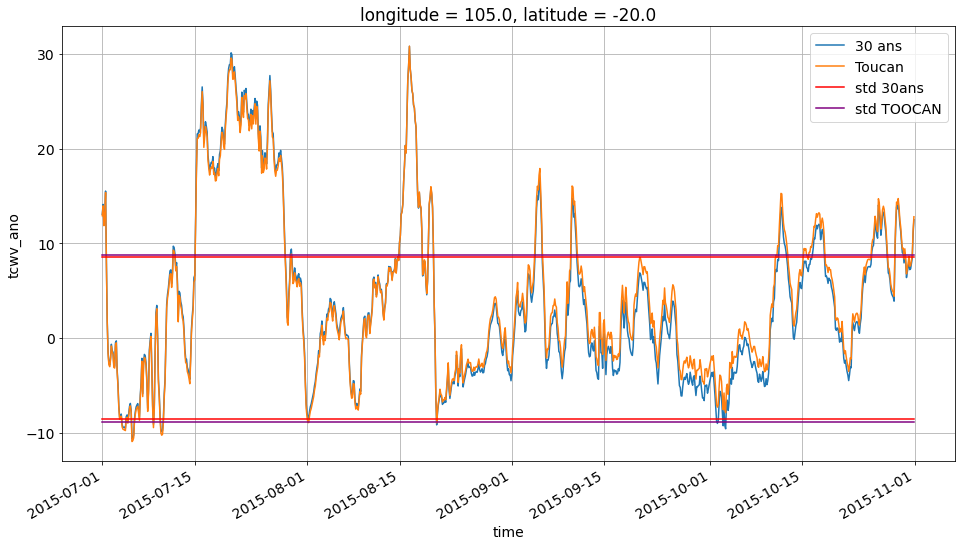

In [21]:
latitude = [-20]
longitude = 105

for i in latitude :
    plt.figure(figsize=(16,8))
    da_jja_only['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = '30 ans')
    da_T_jja_only['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'Toucan')
    std['tcwv_ano'].sel(time = ds.time.dt.month.isin([7, 8, 9, 10]), 
                        latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std 30ans', color = 'red')
    std_n['tcwv_ano'].sel(time = ds.time.dt.month.isin([7, 8, 9, 10]),
                          latitude = i, longitude = longitude, method = 'nearest').plot(color = 'red')
    std_B['tcwv_ano'].sel(time = ds.time.dt.month.isin([7, 8, 9, 10]), 
                        latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std TOOCAN', color = 'purple')
    std_B_n['tcwv_ano'].sel(time = ds.time.dt.month.isin([7, 8, 9, 10]),
                          latitude = i, longitude = longitude, method = 'nearest').plot(color = 'purple') 
    # ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
    plt.grid()
    plt.legend()
    plt.show()